# TP1 AA1
Martin Gaspar Heredia

DNI: 42.697.387

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de Regresión Lineal y Análisis de Importancia de Variables**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets/?Task=Regression&skip=0&take=10&sort=desc&orderBy=NumHits&search=  
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas (1 target, 3 o más features).  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

# ✅ Dataset elegido


Este notebook aplica un modelo de regresión lineal al dataset **"Real Estate Valuation**"
del ***UCI ML Repository*** para predecir el precio por unidad de área. Incluye análisis
exploratorio, preprocesamiento, entrenamiento del modelo, evaluación e interpretación
de la importancia de las variables.


### 📌 Punto 1 - Carga y preparación inicial del dataset "Real Estate Valuation"

## 🧩 1. Instalación de librerías necesarias (si no están instaladas)

In [ ]:
# : Aseguramos que la librería ucimlrepo esté instalada en el entorno de Colab.
# --quiet evita que se muestre la salida detallada de la instalación.

!pip install ucimlrepo --quiet

## 🧠 2. Importación de librerías y configuraciones generales

In [ ]:
# Objetivo: Cargar todas las herramientas (librerías) necesarias para el análisis
# y configurar algunas opciones para mejorar la visualización de los datos.

# Importación de librerías fundamentales para manipulación de datos y numéricos
import pandas as pd  # Para trabajar con DataFrames (tablas de datos)
import numpy as np   # Para operaciones numéricas, especialmente arrays

# Importación de librerías para visualización
import matplotlib.pyplot as plt # Para crear gráficos estáticos
import seaborn as sns           # Para crear gráficos estadísticos más atractivos

# Importación de la función para descargar datasets de UCI
from ucimlrepo import fetch_ucirepo

# Importación de módulos específicos de Scikit-Learn para Machine Learning
from sklearn.model_selection import train_test_split # Para dividir datos en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler     # Para escalar/estandarizar variables numéricas
from sklearn.linear_model import LinearRegression    # El modelo de Regresión Lineal
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Métricas para evaluar el modelo
from sklearn.inspection import permutation_importance # Para evaluar la importancia de variables

# Configuraciones opcionales para mejorar la visualización en Pandas y Numpy
plt.style.use('seaborn-v0_8-whitegrid') # Estilo visual para los gráficos
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # Formato de números flotantes en Pandas (3 decimales)
pd.set_option('display.max_columns', None)                   # Muestra todas las columnas de los DataFrames
# np.set_printoptions(suppress=True, precision=4)              # Evita notación científica en Numpy y fija 4 decimales

# Módulo para mostrar DataFrames de forma más elegante en notebooks
from IPython.display import display

print("✅ Librerías importadas y configuraciones aplicadas.")

✅ Librerías importadas y configuraciones aplicadas.


## 📥 3. Carga del dataset desde UCI

In [ ]:
# Objetivo: Obtener los datos del repositorio UCI usando su ID.
# Se separa en características (X) y variable objetivo (y), y luego se unen
# en un DataFrame crudo (df_raw) para el análisis inicial.

df_raw = pd.DataFrame() # Inicializar df_raw vacío por si falla la carga

try:
    # Descargar el dataset con ID 477 ("Real Estate Valuation")
    real_estate_valuation = fetch_ucirepo(id=477)

    # Extraer las características (variables predictoras)
    X_raw_full = real_estate_valuation.data.features
    # Extraer la variable objetivo (precio por unidad de área)
    # Se accede directamente a la columna específica del target.
    y_raw = real_estate_valuation.data.targets['Y house price of unit area']

    # Combinar características y objetivo en un único DataFrame inicial
    # axis=1 indica que se unan como columnas.
    df_raw = pd.concat([X_raw_full, y_raw], axis=1)

    print("✅ Dataset cargado exitosamente desde ucimlrepo.")
    # .shape devuelve una tupla (número de filas, número de columnas)
    print(f"📊 Dimensiones iniciales del dataset: {df_raw.shape}")

except Exception as e:
    # Captura cualquier error durante la carga y muestra un mensaje informativo.
    print(f"❌ Error al cargar datos con ucimlrepo: {e}")
    print("💡 Verifica tu conexión a internet o considera descargar el archivo manualmente.")


✅ Dataset cargado exitosamente desde ucimlrepo.
📊 Dimensiones iniciales del dataset: (414, 7)


## 🧹 4. Limpieza de nombres de columnas para estandarizarlos

In [ ]:
# Objetivo: Estandarizar los nombres de las columnas para facilitar su uso.
# Se convierten a minúsculas y se reemplazan espacios por guiones bajos.

# Verificar si df_raw se cargó correctamente antes de proceder
if not df_raw.empty:
    print("\n📋 Nombres originales de columnas:")
    print(df_raw.columns) # Muestra la lista de nombres actuales

    # Aplicar una list comprehension para transformar cada nombre de columna:
    # col.strip() elimina espacios al inicio/final
    # .replace(' ', '_') reemplaza espacios internos por guiones bajos
    # .lower() convierte todo a minúsculas
    df_raw.columns = [col.strip().replace(' ', '_').lower() for col in df_raw.columns]

    print("\n✅ Nombres de columnas limpiados:")
    print(df_raw.columns) # Muestra los nuevos nombres
else:
    print("\n⚠️ El DataFrame df_raw está vacío. Saltando limpieza de nombres.")



📋 Nombres originales de columnas:
Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

✅ Nombres de columnas limpiados:
Index(['x1_transaction_date', 'x2_house_age',
       'x3_distance_to_the_nearest_mrt_station',
       'x4_number_of_convenience_stores', 'x5_latitude', 'x6_longitude',
       'y_house_price_of_unit_area'],
      dtype='object')


# 4.1 Traducción de nombres de las columnas de ingles a español

In [ ]:
# Objetivo: Renombrar las columnas a español para mejorar la interpretabilidad

if not df_raw.empty:
    print("\n🔄 Traduciendo nombres de columnas a español...")

    # Diccionario original con posibles columnas
    column_mapping_es = {
        'no': 'id_registro',
        'x1_transaction_date': 'fecha_transaccion',
        'x2_house_age': 'antiguedad_casa',
        'x3_distance_to_the_nearest_mrt_station': 'distancia_estacion_mrt',
        'x4_number_of_convenience_stores': 'num_tiendas_conveniencia',
        'x5_latitude': 'latitud',
        'x6_longitude': 'longitud',
        'y_house_price_of_unit_area': 'precio_por_unidad_area'
    }

    # Filtrar solo las columnas que existen en df_raw
    columnas_existentes = {k: v for k, v in column_mapping_es.items() if k in df_raw.columns}

    # Aplicar el renombrado
    df_raw.rename(columns=columnas_existentes, inplace=True)
    print("✅ Nombres de columnas traducidos a español:")
    print(df_raw.columns)

    # Definir el nombre de la columna objetivo en español
    columna_objetivo = 'precio_por_unidad_area'
else:
    print("\n⚠️ El DataFrame df_raw está vacío. Saltando traducción de nombres.")




🔄 Traduciendo nombres de columnas a español...
✅ Nombres de columnas traducidos a español:
Index(['fecha_transaccion', 'antiguedad_casa', 'distancia_estacion_mrt',
       'num_tiendas_conveniencia', 'latitud', 'longitud',
       'precio_por_unidad_area'],
      dtype='object')


## 👁️‍🗨️ 5. Revisión general del dataset

In [ ]:
# Objetivo: Obtener una primera vista de los datos y su estructura después de la limpieza
# y traducción inicial.

# Verificar si df_raw se cargó y renombró correctamente
if not df_raw.empty and 'precio_por_unidad_area' in df_raw.columns: # Chequea si existe la columna objetivo traducida
    print("\n🔎 Primeras 5 filas del dataset (con nombres en español):")
    # display() es preferible a print() para DataFrames en notebooks
    display(df_raw.head())

    print("\n📌 Información general del DataFrame (tipos de datos y nulos):")
    # .info() muestra el tipo de dato de cada columna y la cantidad de valores no nulos.
    # Es útil para una detección rápida de tipos incorrectos o faltantes.
    df_raw.info()
else:
    print("\n⚠️ No se puede mostrar la revisión general (df_raw vacío o columnas no renombradas).")



🔎 Primeras 5 filas del dataset (con nombres en español):


,fecha_transaccion,antiguedad_casa,distancia_estacion_mrt,num_tiendas_conveniencia,latitud,longitud,precio_por_unidad_area
0,2012.917,32.000,84.879,10,24.983,121.540,37.900
1,2012.917,19.500,306.595,9,24.980,121.540,42.200
2,2013.583,13.300,561.985,5,24.987,121.544,47.300
3,2013.500,13.300,561.985,5,24.987,121.544,54.800
4,2012.833,5.000,390.568,5,24.979,121.542,43.100



📌 Información general del DataFrame (tipos de datos y nulos):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   fecha_transaccion         414 non-null    float64
 1   antiguedad_casa           414 non-null    float64
 2   distancia_estacion_mrt    414 non-null    float64
 3   num_tiendas_conveniencia  414 non-null    int64  
 4   latitud                   414 non-null    float64
 5   longitud                  414 non-null    float64
 6   precio_por_unidad_area    414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB



## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - **Pregunta clave**: ¿Qué relaciones lineales preliminares observan?  


# 📊 2. Análisis Exploratorio de Datos (EDA)
* ***Objetivo***: Calcular estadísticas descriptivas básicas para entender la escala, centro y dispersión de cada variable numérica. Se excluye la columna 'id_registro'.

* ***Introducción al Análisis Descriptivo:***
 Se busca obtener medidas como la media, desviación estándar, mínimo, máximo y cuartiles.
* ***Esto ayuda a identificar***:
 - Rango de valores de cada variable.
 - Posibles diferencias de escala entre variables.
 - Valores medios y dispersión (variabilidad).
 - Primeros indicios de posibles outliers (comparando media con mediana (50%), o min/max extremos).

## Resolución:

### 📊 2.1 Descripción estadística

En esta sección realizamos un análisis descriptivo de las variables numéricas. Se calcularán medidas como media, desviación estándar, valores mínimos y máximos. Se excluye la columna `no` por ser un identificador.

Se busca observar:
- Valores atípicos (outliers)
- Rango de variación de cada feature
- Posibles problemas de escala



> Agregar bloque entrecomillado



In [ ]:
# Verificar si df_raw existe y no está vacío
if not df_raw.empty:
    print("\nResumen estadístico (excluyendo 'id_registro'):")
    try:
        # .drop() para quitar la columna 'id_registro'. axis=1 indica que es una columna.
        # errors='ignore' evita un error si la columna ya no existiera.
        # .describe() calcula las estadísticas descriptivas.
        # .T transpone la tabla para mejor legibilidad (estadísticas como filas).
        display(df_raw.drop('id_registro', axis=1, errors='ignore').describe().T)
    except Exception as e:
        print(f"❌ Ocurrió un error al calcular estadísticas descriptivas: {e}")
else:
    print("\n❌ El DataFrame df_raw está vacío. Saltando descripción estadística.")


Resumen estadístico (excluyendo 'id_registro'):


,count,mean,std,min,25%,50%,75%,max
fecha_transaccion,414.000,2013.149,0.282,2012.667,2012.917,2013.167,2013.417,2013.583
antiguedad_casa,414.000,17.713,11.392,0.000,9.025,16.100,28.150,43.800
distancia_estacion_mrt,414.000,1083.886,1262.110,23.383,289.325,492.231,1454.279,6488.021
num_tiendas_conveniencia,414.000,4.094,2.946,0.000,1.000,4.000,6.000,10.000
latitud,414.000,24.969,0.012,24.932,24.963,24.971,24.977,25.015
longitud,414.000,121.533,0.015,121.474,121.528,121.539,121.543,121.566
precio_por_unidad_area,414.000,37.980,13.606,7.600,27.700,38.450,46.600,117.500


### 🔍 2.2 Verificación de valores faltantes

Es importante verificar si existen valores nulos en el dataset antes de aplicar modelos. En caso de encontrar valores faltantes, se deben tomar decisiones de imputación o eliminación.

En este caso, verificamos si alguna columna contiene valores nulos.


In [ ]:
if not df_raw.empty:
    print("\nConteo de valores faltantes por columna:")
    # .isnull() devuelve un DataFrame booleano (True si es nulo, False si no).
    # .sum() suma los True por columna (contando los nulos).
    missing_values = df_raw.isnull().sum()
    print(missing_values)

    # Comprobar si el total de valores faltantes es cero.
    if missing_values.sum() == 0:
        print("\n✅ ¡Excelente! No hay valores faltantes en el dataset.")
    else:
        print("\n⚠️ ¡Atención! Se encontraron valores faltantes. Se deberán tratar.")
else:
    print("\n❌ El DataFrame df_raw está vacío. Saltando verificación de valores faltantes.")



Conteo de valores faltantes por columna:
fecha_transaccion           0
antiguedad_casa             0
distancia_estacion_mrt      0
num_tiendas_conveniencia    0
latitud                     0
longitud                    0
precio_por_unidad_area      0
dtype: int64

✅ ¡Excelente! No hay valores faltantes en el dataset.


### 📈 2.3 Visualización de distribuciones - Histogramas
* Los histogramas agrupan los valores en rangos (bins) y muestran la frecuencia de cada rango.
* El `kde=True` añade una curva suavizada estimada de la densidad de probabilidad.
*Permiten detectar:
 - Sesgo (skewness): Asimetría hacia la izquierda o derecha.
 - Curtosis: Si la distribución es más picuda o aplanada que la normal.
 - Modalidad: Número de picos (unimodal, bimodal).


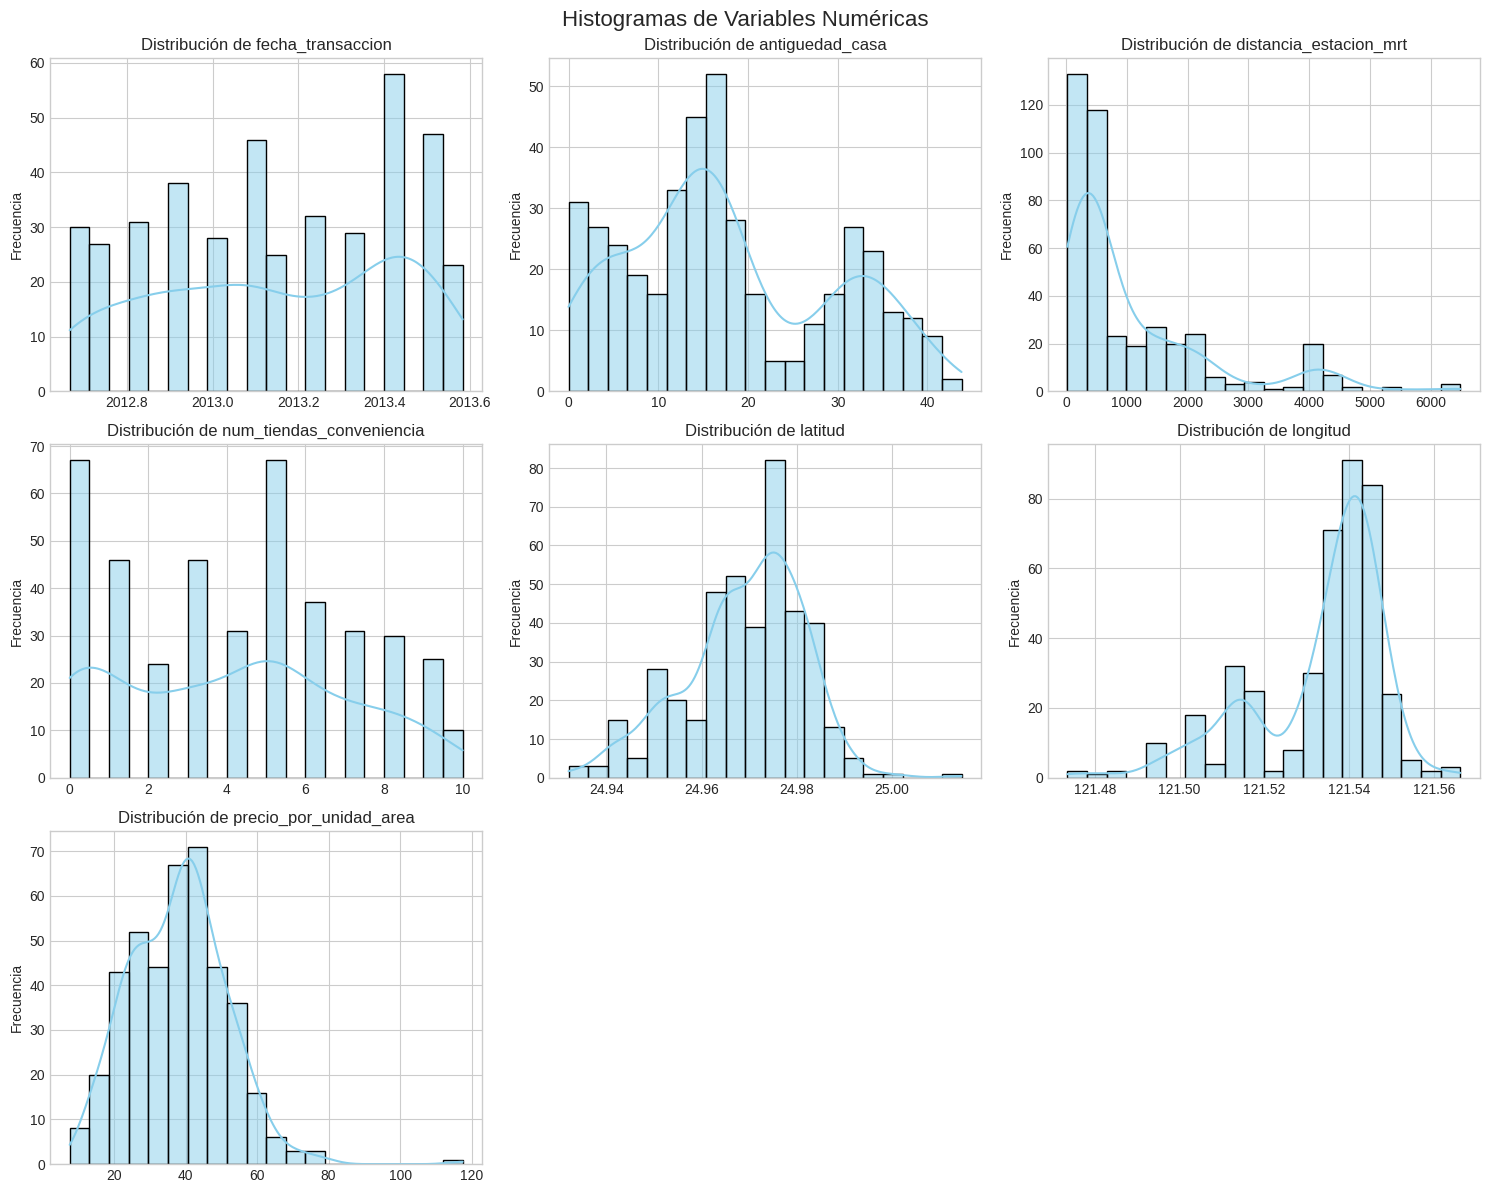

In [ ]:
# Importar 'math' si no se hizo antes, necesario para calcular filas/columnas del gráfico
import math

# Verificar si df_raw existe y no está vacío
if not df_raw.empty:
    # Seleccionar columnas numéricas, excluyendo 'id_registro'
    try:
        columnas_numericas_plot = df_raw.select_dtypes(include=np.number).columns.drop('id_registro', errors='ignore')
    except Exception as e:
        print(f"❌ Error seleccionando columnas numéricas: {e}")
        columnas_numericas_plot = pd.Index([]) # Crear índice vacío para evitar error posterior

    if not columnas_numericas_plot.empty:
        n_cols_plot = 3 # Número de columnas en la grilla de gráficos
        # Calcular el número de filas necesarias usando math.ceil (redondeo hacia arriba)
        n_rows_plot = math.ceil(len(columnas_numericas_plot) / n_cols_plot)

        # Crear la figura y los ejes (subplots)
        # figsize controla el tamaño total de la figura
        fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(15, n_rows_plot * 4))
        # .flatten() convierte la matriz de ejes (axes) en un array 1D para iterar fácilmente
        axes = axes.flatten()

        # Iterar sobre las columnas numéricas y sus índices
        for i, col in enumerate(columnas_numericas_plot):
            # Usar sns.histplot para crear el histograma en el eje correspondiente (axes[i])
            # kde=True añade la curva de densidad
            # bins=20 define el número de barras (ajustable)
            sns.histplot(df_raw[col], kde=True, ax=axes[i], bins=20, color='skyblue')
            axes[i].set_title(f'Distribución de {col}') # Título del subplot
            axes[i].set_xlabel('') # Limpiar etiqueta eje X (opcional)
            axes[i].set_ylabel('Frecuencia') # Etiqueta eje Y

        # Ocultar ejes que no se usaron (si el número de plots no es múltiplo de n_cols_plot)
        for j in range(i + 1, len(axes)):
             fig.delaxes(axes[j]) # Elimina el subplot vacío

        plt.tight_layout() # Ajusta automáticamente el espaciado para evitar solapamientos
        plt.subplots_adjust(top=0.95) # Ajusta el margen superior para el título general
        plt.suptitle('Histogramas de Variables Numéricas', fontsize=16, y=0.99) # Título general
        plt.show() # Muestra el gráfico
    else:
        print("\n⚠️ No hay columnas numéricas adecuadas para graficar histogramas.")
else:
    print("\n❌ El DataFrame df_raw está vacío. Saltando histogramas.")

### 📦 2.4 Visualización de outliers - Boxplots

* Los boxplots resumen la distribución mostrando la mediana (línea central), los cuartiles Q1 y Q3 (la caja), y los "bigotes" que usualmente se extienden hasta 1.5 veces el Rango Intercuartílico (IQR = Q3 - Q1) desde la caja.
* Los puntos fuera de los bigotes se consideran posibles outliers.
* Son útiles para comparar distribuciones y detectar asimetrías y valores extremos.

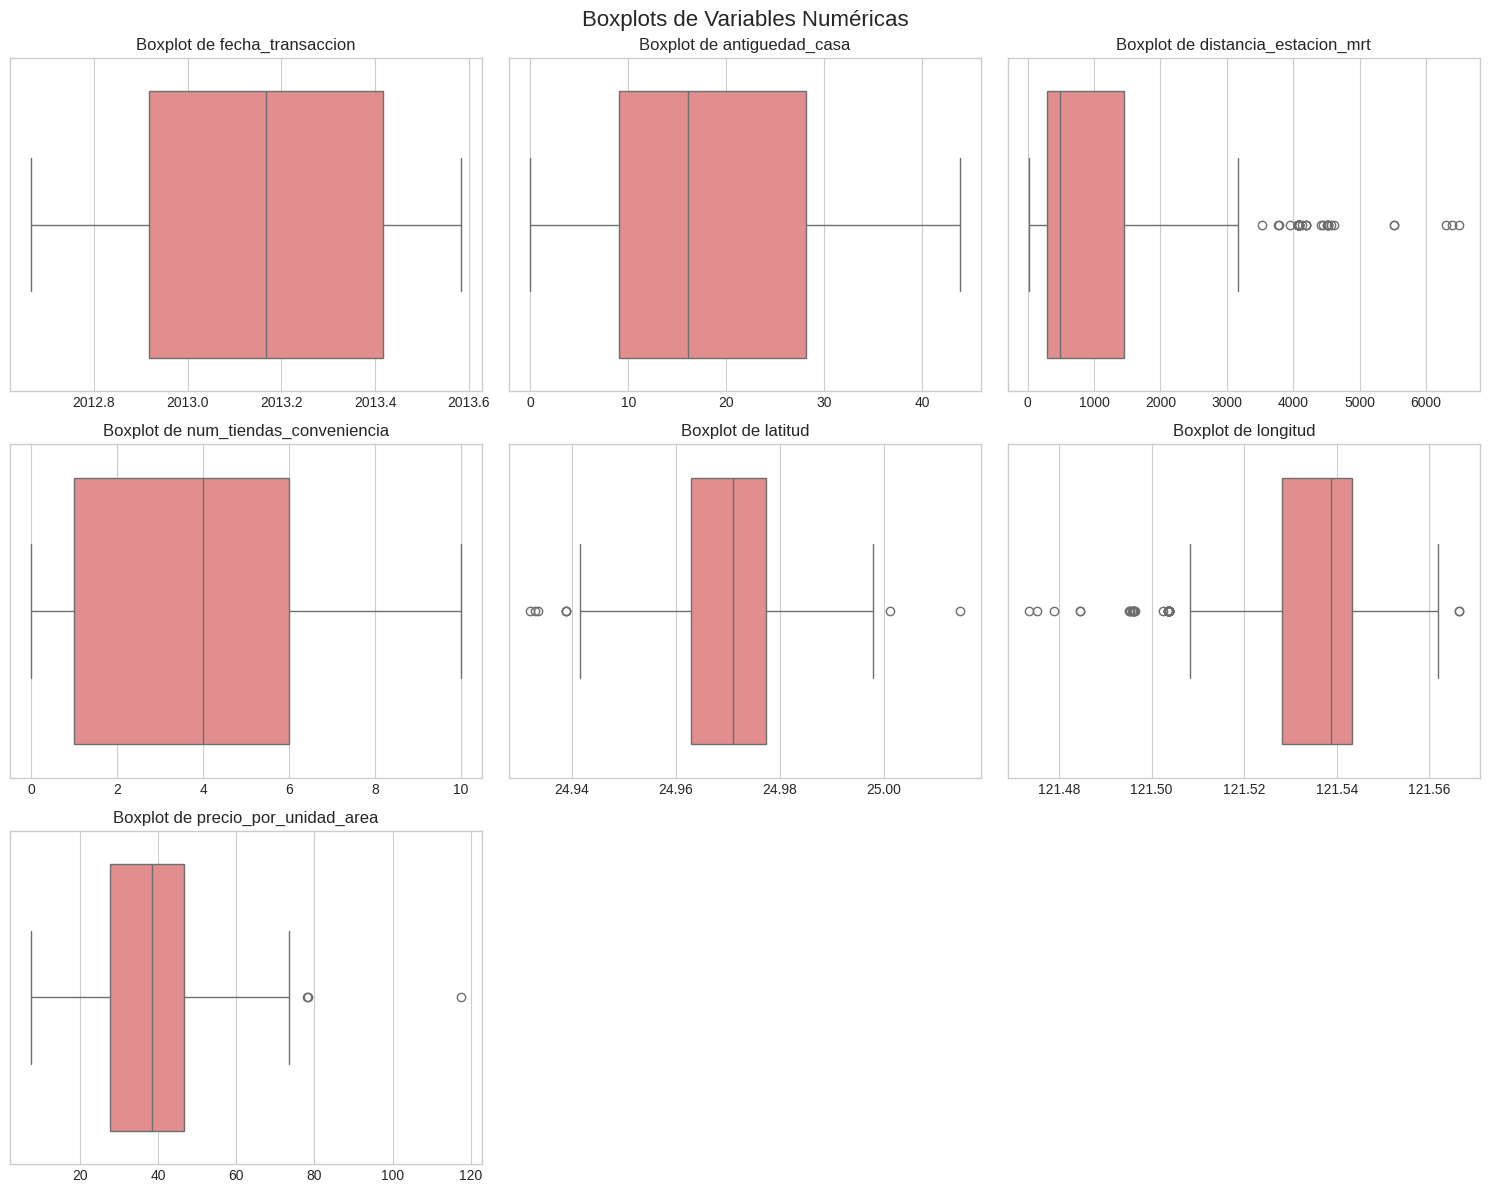

In [ ]:
# Verificar si df_raw existe y no está vacío
if not df_raw.empty:
     # Re-seleccionar columnas numéricas por si acaso (podría hacerse una sola vez antes)
    try:
        columnas_numericas_plot = df_raw.select_dtypes(include=np.number).columns.drop('id_registro', errors='ignore')
    except Exception as e:
        print(f"❌ Error seleccionando columnas numéricas: {e}")
        columnas_numericas_plot = pd.Index([])

    if not columnas_numericas_plot.empty:
        n_cols_plot = 3
        n_rows_plot = math.ceil(len(columnas_numericas_plot) / n_cols_plot)

        fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(15, n_rows_plot * 4))
        axes = axes.flatten()

        i = 0 # Contador para saber cuántos plots se hicieron realmente
        for col in columnas_numericas_plot:
            # Usar sns.boxplot para crear el boxplot horizontal
            sns.boxplot(x=df_raw[col], ax=axes[i], color='lightcoral')
            axes[i].set_title(f'Boxplot de {col}')
            axes[i].set_xlabel('') # Limpiar etiqueta eje X
            i += 1 # Incrementar contador solo si se hizo el plot

        # Ocultar ejes sobrantes usando el contador 'i'
        for j in range(i, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.subplots_adjust(top=0.95)
        plt.suptitle('Boxplots de Variables Numéricas', fontsize=16, y=0.99)
        plt.show()
    else:
        print("\n⚠️ No hay columnas numéricas adecuadas para graficar boxplots.")
else:
    print("\n❌ El DataFrame df_raw está vacío. Saltando boxplots.")

### 🔄 2.5 Relación entre features y variable objetivo (scatterplots)
* **Objetivo**: Visualizar la relación entre cada variable predictora (feature) y la variable objetivo (target), buscando patrones lineales o no lineales.
* Los Scartterplots muestran la relación entre dos variables numéricas. Cada punto representa una observación.
* Son útiles para detectar:
   - Correlación lineal: Si los puntos tienden a seguir una línea recta (positiva o negativa).
   - Relaciones no lineales: Curvas, U invertida, etc.
   - Outliers bivariados: Puntos alejados del patrón general.
 - Heterocedasticidad: Si la dispersión de los puntos cambia a lo largo del eje X.
* Se excluye 'id_registro' y 'fecha_transaccion' (por no ser directamente interpretable numéricamente).




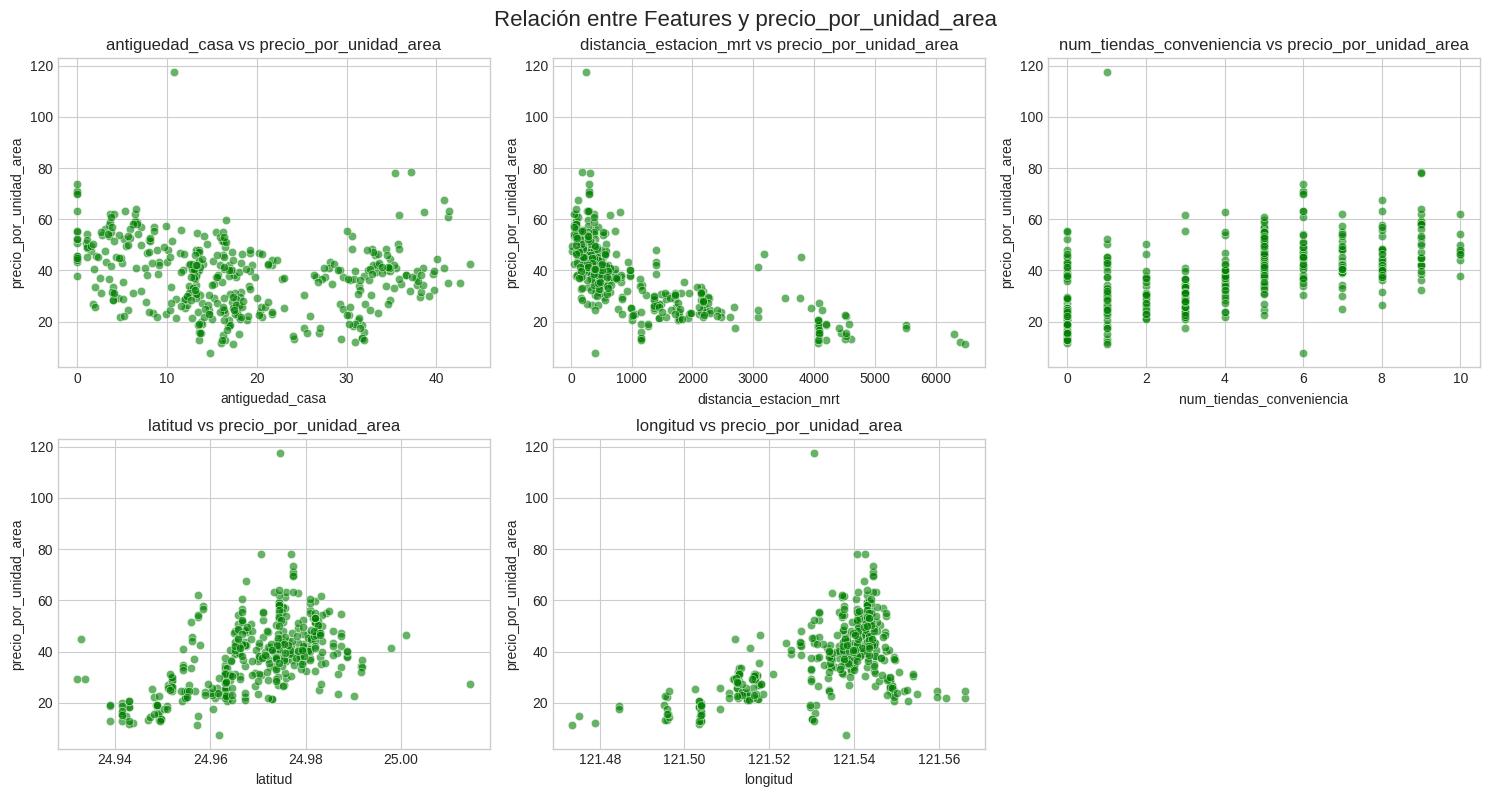

In [ ]:
# Verificar si df_raw existe y si la columna objetivo está presente
if not df_raw.empty and columna_objetivo in df_raw.columns:
    # Identificar las features a graficar (todas menos id, fecha y el propio target)
    features_para_scatter = df_raw.columns.drop(['id_registro', 'fecha_transaccion', columna_objetivo], errors='ignore')
    # Filtrar solo las numéricas por si acaso alguna no lo fuera
    features_para_scatter = df_raw[features_para_scatter].select_dtypes(include=np.number).columns

    if not features_para_scatter.empty:
        n_cols_plot = 3
        n_rows_plot = math.ceil(len(features_para_scatter) / n_cols_plot)

        fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(15, n_rows_plot * 4))
        axes = axes.flatten()

        i = 0 # Contador
        for feature in features_para_scatter:
            # Usar sns.scatterplot
            # alpha=0.6 hace los puntos semitransparentes para ver superposiciones
            sns.scatterplot(data=df_raw, x=feature, y=columna_objetivo, ax=axes[i], alpha=0.6, color='green')
            axes[i].set_title(f'{feature} vs {columna_objetivo}')
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel(columna_objetivo)
            i += 1

        # Ocultar ejes sobrantes
        for j in range(i, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.subplots_adjust(top=0.93) # Más espacio para el título largo
        plt.suptitle(f'Relación entre Features y {columna_objetivo}', fontsize=16, y=0.99)
        plt.show()
    else:
        print("\n⚠️ No hay features numéricas adecuadas para graficar scatterplots con el target.")
else:
    print(f"\n❌ No se puede graficar scatterplots (df_raw vacío o columna '{columna_objetivo}' no encontrada).")


### 🧮 2.6 Matriz de correlación
Esta mide la fuerza y dirección de la relación lineal entre pares de variables.
* El coeficiente de correlación de Pearson varía entre -1 y +1:
   * +1: Correlación lineal positiva perfecta.
   *  -1: Correlación lineal negativa perfecta.
   *  0: Sin correlación lineal.

* Un heatmap (mapa de calor) es una excelente forma de visualizarla: colores intensos indican correlaciones fuertes.

* Se busca:
 - Correlaciones altas (positivas o negativas) entre features y el target (buenos predictores potenciales).
 - Correlaciones altas entre features (riesgo de multicolinealidad, donde una variable puede ser predicha por otra).


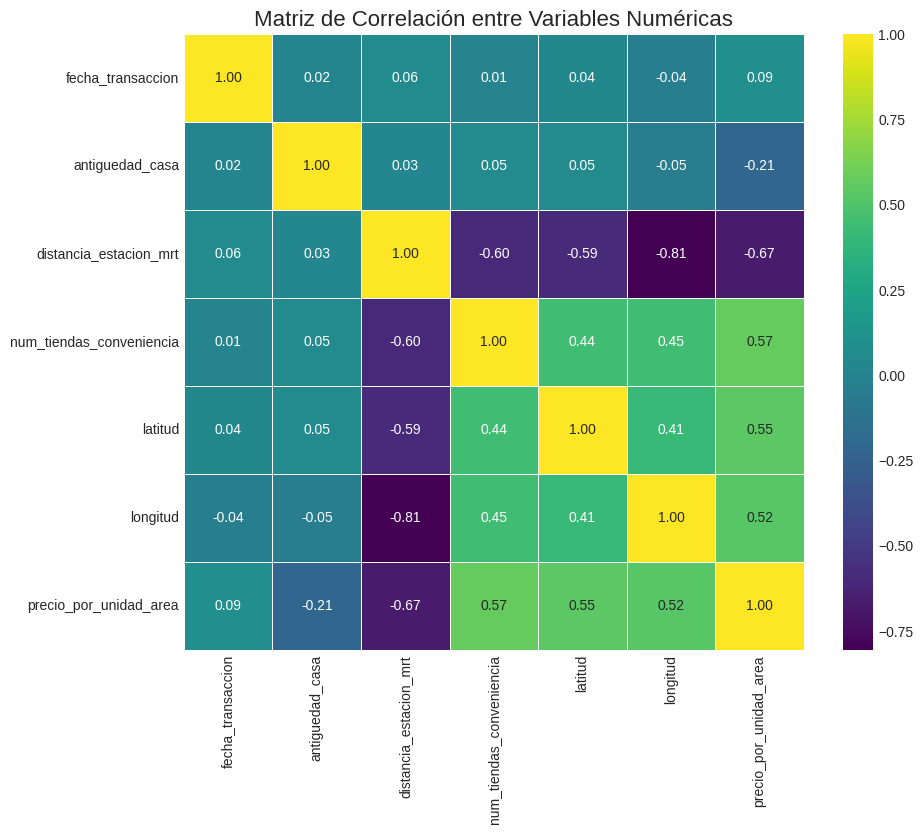


Correlación de features con 'precio_por_unidad_area':
num_tiendas_conveniencia    0.571
latitud                     0.546
longitud                    0.523
fecha_transaccion           0.087
antiguedad_casa            -0.211
distancia_estacion_mrt     -0.674
Name: precio_por_unidad_area, dtype: float64


In [ ]:
# Verificar si df_raw existe y no está vacío
if not df_raw.empty:
    # Seleccionar solo columnas numéricas para el cálculo
    df_numeric = df_raw.select_dtypes(include=np.number).drop('id_registro', axis=1, errors='ignore')

    if len(df_numeric.columns) > 1: # Se necesitan al menos 2 columnas numéricas
        # Calcular la matriz de correlación
        corr_matrix = df_numeric.corr()

        # Visualizar la matriz con un heatmap
        plt.figure(figsize=(10, 8)) # Tamaño de la figura
        # annot=True muestra los valores de correlación en las celdas
        # cmap='viridis' define la paleta de colores
        # fmt=".2f" formatea los números a 2 decimales
        sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
        plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
        plt.show()

        # Mostrar correlación específica con la variable objetivo
        if columna_objetivo in corr_matrix.columns:
             print(f"\nCorrelación de features con '{columna_objetivo}':")
             # Seleccionar la columna del target, quitar la correlación consigo misma (drop)
             # y ordenar de mayor a menor correlación (absoluta o no, aquí es directa)
             corr_target = corr_matrix[columna_objetivo].drop(columna_objetivo, errors='ignore').sort_values(ascending=False)
             print(corr_target)
        else:
             print(f"\n⚠️ No se pudo calcular la correlación con el target ('{columna_objetivo}' no es numérica o no existe).")
    else:
        print("\n⚠️ No hay suficientes columnas numéricas para calcular la matriz de correlación.")
else:
    print("\n❌ El DataFrame df_raw está vacío. Saltando matriz de correlación.")


# 🔍 Conclusiones clave:

1)- La variable más fuertemente correlacionada (negativamente) es la distancia a la
estación MRT (-0.674):

Esto indica que cuanto más lejos está una propiedad de una estación de MRT, menor es el precio por unidad de área. Es una correlación negativa fuerte, por lo tanto, la cercanía al transporte público es un factor clave para el valor.

2)- Las tiendas por conveniencia (+0.571), latitud (+0.546) y longitud (+0.523) tienen correlaciones positivas moderadas a fuertes:
Esto sugiere que:

* Más tiendas cercanas implican mayor precio por metro cuadrado.

* Ubicación geográfica (latitud y longitud) también es relevante: puede estar reflejando que ciertas zonas específicas (probablemente más céntricas o urbanas) tienen mayor valor.

3)- La antigüedad de la casa (-0.211) tiene una correlación negativa débil a moderada:
Las casas más antiguas tienden a valer menos por unidad de área, aunque el efecto no es tan fuerte como el de la distancia a MRT.

4)-La fecha de transacción (0.087) apenas tiene correlación positiva débil:
El valor de la propiedad no varía mucho a lo largo del tiempo en este conjunto de datos. Puede indicar un mercado relativamente estable en el período analizado.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Escalen las features (p.ej., StandardScaler) para comparar coeficientes después.  
   - Dividan en train/test (70-30 o 80-20).  

## Resolución:

### 🧹 3.1 Selección de Features y Target

Se eligen las variables que se consideran relevantes para predecir el target.

Se descartan identificadores ('id_registro') y variables que no aportan información útil en su formato actual ('fecha_transaccion') o que son redundantes




In [ ]:
# Verificar si df_raw existe y no está vacío
if not df_raw.empty:
    # Crear una copia de df_raw para no modificar el original durante el preprocesamiento
    df = df_raw.copy()

    # Definir las columnas que se usarán como features (predictoras)
    # Usamos los nombres ya traducidos a español.
    features_a_mantener = [
        'antiguedad_casa',
        'distancia_estacion_mrt',
        'num_tiendas_conveniencia',
        'latitud',
        'longitud'
    ]
    # El nombre de la columna objetivo ya está en la variable `columna_objetivo`

    # --- Validación Crucial: Asegurar que todas las columnas seleccionadas existen ---
    columnas_necesarias = features_a_mantener + [columna_objetivo]
    columnas_faltantes = [col for col in columnas_necesarias if col not in df.columns]

    if columnas_faltantes:
        print(f"❌ Error Crítico: Las siguientes columnas necesarias no existen en el DataFrame 'df': {columnas_faltantes}")
        print("   Revisa los pasos anteriores (carga, limpieza, traducción). No se puede continuar.")
        # Detener la ejecución o manejar el error según sea necesario. Aquí se detendría el flujo.
        X, y = None, None # Marcar como indefinidos para los siguientes pasos
    else:
        # --- Separación en X (features) e y (target) ---
        X = df[features_a_mantener] # DataFrame con solo las columnas predictoras
        y = df[columna_objetivo]    # Serie con la columna objetivo

        print(f"\nFeatures seleccionadas (X): {list(X.columns)}")
        print(f"Target (y): {y.name}")
        print(f"Dimensiones de X: {X.shape}")
        print(f"Dimensiones de y: {y.shape}")

else:
    print("\n❌ El DataFrame df_raw está vacío. Saltando selección de features.")
    X, y = None, None # Marcar como indefinidos


Features seleccionadas (X): ['antiguedad_casa', 'distancia_estacion_mrt', 'num_tiendas_conveniencia', 'latitud', 'longitud']
Target (y): precio_por_unidad_area
Dimensiones de X: (414, 5)
Dimensiones de y: (414,)


### 🔍 3.2 Verificación de valores faltantes

Se revisa si existen valores faltantes en las variables seleccionadas. Si los hubiera, se decidiría entre imputarlos o eliminarlos.

✅ En este dataset no se encontraron valores nulos, por lo tanto no es necesaria ninguna acción de imputación.


In [ ]:
# Verificar si X e y se crearon correctamente en la celda anterior
if X is not None and y is not None:
    print("\nValores faltantes en X (features seleccionadas):")
    missing_X = X.isnull().sum()
    print(missing_X)
    if missing_X.sum() == 0:
        print("✅ No hay valores faltantes en X.")
    else:
        print("⚠️ Se encontraron valores faltantes en X. Requieren tratamiento.")

    print(f"\nValores faltantes en y ({columna_objetivo}):")
    missing_y = y.isnull().sum()
    print(missing_y)
    if missing_y == 0:
         print(f"✅ No hay valores faltantes en y.")
    else:
         print(f"⚠️ Se encontraron valores faltantes en y. Requieren tratamiento (probablemente eliminar filas).")
else:
    print("\n❌ Las variables X e y no fueron definidas correctamente. Saltando verificación de faltantes.")



Valores faltantes en X (features seleccionadas):
antiguedad_casa             0
distancia_estacion_mrt      0
num_tiendas_conveniencia    0
latitud                     0
longitud                    0
dtype: int64
✅ No hay valores faltantes en X.

Valores faltantes en y (precio_por_unidad_area):
0
✅ No hay valores faltantes en y.


### 🧠 3.3 Variables categóricas
Las variables categóricas representan categorías o grupos (ej: 'tipo_propiedad', 'ciudad').

Los modelos lineales requieren que sean numéricas, por lo que usualmente se codifican usando técnicas como One-Hot Encoding (crear columnas binarias por categoría).

En este dataset, todas las features seleccionadas son numéricas.

Este dataset no contiene variables categóricas. Todas las features seleccionadas (`x2` a `x6`) son numéricas.

➡️ No se requiere aplicar codificación como One-Hot Encoding (OHE).


In [ ]:
# Verificar si 'df' (la copia de df_raw) existe
if 'df' in locals():
    print("\nVerificando tipos de datos en el DataFrame 'df':")
    print(df.dtypes)

    # Detectar columnas de tipo 'object' (texto) o 'category'
    columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns
    if not columnas_categoricas.empty:
        print(f"\n⚠️ Variables categóricas detectadas: {list(columnas_categoricas)}")
        print("   Se requeriría codificación (ej: One-Hot Encoding) si se usaran.")
    else:
        print("\n✅ No se detectaron variables categóricas en el DataFrame 'df'.")
else:
    print("\n❌ El DataFrame 'df' no está definido. Saltando verificación de categóricas.")



Verificando tipos de datos en el DataFrame 'df':
fecha_transaccion           float64
antiguedad_casa             float64
distancia_estacion_mrt      float64
num_tiendas_conveniencia      int64
latitud                     float64
longitud                    float64
precio_por_unidad_area      float64
dtype: object

✅ No se detectaron variables categóricas en el DataFrame 'df'.


### ⚠️ 3.4 Análisis de outliers

Los outliers pueden influir desproporcionadamente en modelos sensibles como la regresión lineal.

Las opciones comunes son:
- Eliminarlos (si son errores de datos o muy pocos).
- Transformar la variable (ej: logaritmo) para reducir su impacto.
- Usar modelos robustos a outliers (ej: RANSACRegressor, HuberRegressor).
- Winsorización: Limitar los valores extremos a un percentil

Decisión: Para este modelo base, no se tratarán los outliers observados en 'distancia_estacion_mrt' y 'precio_por_unidad_area', pero se tiene en cuenta como posible mejora futura si el rendimiento es bajo.



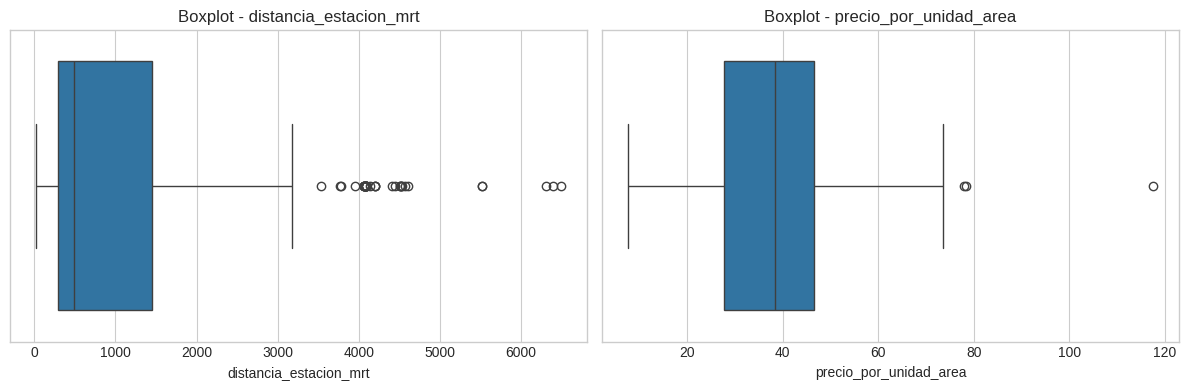

-> Decisión: No se aplicará tratamiento específico de outliers en esta fase.


In [ ]:
if 'df' in locals() and 'distancia_estacion_mrt' in df.columns and columna_objetivo in df.columns:
     plt.figure(figsize=(12, 4))
     plt.subplot(1, 2, 1)
     sns.boxplot(x=df['distancia_estacion_mrt'])
     plt.title('Boxplot - distancia_estacion_mrt')
     plt.subplot(1, 2, 2)
     sns.boxplot(x=df[columna_objetivo])
     plt.title(f'Boxplot - {columna_objetivo}')
     plt.tight_layout()
     plt.show()

print("-> Decisión: No se aplicará tratamiento específico de outliers en esta fase.")

###✂️ 3.5 División del dataset (Train/Test)"
Es fundamental para evaluar la capacidad de generalización del modelo.
Entrenar y evaluar en los mismos datos llevaría a una sobreestimación del rendimiento (overfitting).

 Una división común es 80% para entrenamiento y 20% para prueba.
`random_state` asegura que la división sea la misma cada vez que se ejecute el código (reproducibilidad).

Se dividirán los datos en entrenamiento (80%) y prueba (20%) usando train_test_split.

 Esta división permite entrenar el modelo con una parte del dataset y evaluar su desempeño en datos no vistos.

* X_train, y_train: datos de entrenamiento
* X_test, y_test: datos de prueba

El modelo se entrena con 'train' y se evalúa con 'test' (datos no vistos).

La división se hace ANTES de escalar las features.



In [ ]:
# Verificar que X e y existen y no son None
if X is not None and y is not None:
    # Usar train_test_split de sklearn
    X_train, X_test, y_train, y_test = train_test_split(
        X,                     # Features
        y,                     # Target
        test_size=0.2,         # Proporción para el conjunto de prueba (20%)
        random_state=42        # Semilla para reproducibilidad
    )

    print(f"\nDivisión realizada (80% train / 20% test):")
    print(f"  X_train: {X_train.shape}, y_train: {y_train.shape}")
    print(f"  X_test:  {X_test.shape}, y_test:  {y_test.shape}")
else:
    print("\n❌ No se puede dividir el dataset (X o y no están definidos).")
    # Asignar None para evitar errores en celdas posteriores si la división falló
    X_train, X_test, y_train, y_test = None, None, None, None



División realizada (80% train / 20% test):
  X_train: (331, 5), y_train: (331,)
  X_test:  (83, 5), y_test:  (83,)


### 📐 3.6 Escalado de variables (features)
***Objetivo:*** Escalar las variables predictoras numéricas para que tengan una media cercana a 0 y una desviación estándar cercana a 1.

Se aplica DESPUÉS de la división train/test.

Muchas algoritmos de ML (incluyendo Regresión Lineal y métodos basados en distancias) funcionan mejor o convergen más rápido cuando las features están en una escala similar.

El StandardScaler transforma cada feature restando la media y dividiendo por la desviación estándar.

IMPORTANTE:
  1. Se ajusta (`fit`) el scaler SÓLO con los datos de entrenamiento (`X_train`).
     2. Se aplica la transformación (`transform`) tanto a `X_train` como a `X_test` usando el scaler ajustado.

Esto evita filtrar información del conjunto de prueba al de entrenamiento.

In [ ]:
# Verificar si los conjuntos de train/test se crearon
if X_train is not None and X_test is not None:
    # Inicializar el StandardScaler
    scaler = StandardScaler()

    # Ajustar el scaler con X_train y transformar X_train
    # fit_transform() es un atajo para hacer fit() y luego transform()
    X_train_scaled = scaler.fit_transform(X_train)

    # Transformar X_test usando el MISMO scaler ajustado (SOLO transform)
    X_test_scaled = scaler.transform(X_test)

    # Convertir los arrays de Numpy escalados de nuevo a DataFrames de Pandas
    # Esto preserva los nombres de las columnas y los índices, facilitando análisis posteriores.
    X_train_final = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test_final = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

    print("\nEscalado aplicado con StandardScaler:")
    print("\nPrimeras filas de X_train_final (datos escalados):")
    display(X_train_final.head())

    print("\nDescripción estadística de X_train_final (media ≈ 0, std ≈ 1):")
    # La media debería ser muy cercana a 0 y la desviación estándar (std) cercana a 1.
    display(X_train_final.describe().T)
else:
    print("\n❌ No se puede escalar (conjuntos de train/test no definidos).")
    X_train_final, X_test_final = None, None # Marcar como indefinidos



Escalado aplicado con StandardScaler:

Primeras filas de X_train_final (datos escalados):


,antiguedad_casa,distancia_estacion_mrt,num_tiendas_conveniencia,latitud,longitud
192,2.344,-0.824,0.968,-0.147,0.455
234,-0.821,0.951,-0.049,-0.743,-1.356
5,-0.901,0.917,-0.388,-0.504,-1.427
45,1.707,-0.469,1.307,0.066,0.739
245,-0.865,-0.345,0.290,0.260,0.953



Descripción estadística de X_train_final (media ≈ 0, std ≈ 1):


,count,mean,std,min,25%,50%,75%,max
antiguedad_casa,331.000,0.000,1.002,-1.529,-0.781,-0.123,0.876,2.344
distancia_estacion_mrt,331.000,-0.000,1.002,-0.852,-0.633,-0.467,0.315,4.314
num_tiendas_conveniencia,331.000,0.000,1.002,-1.405,-1.066,-0.049,0.629,1.985
latitud,331.000,0.000,1.002,-2.989,-0.507,0.142,0.716,3.631
longitud,331.000,0.000,1.002,-3.927,-0.282,0.353,0.642,2.166


📌 Conclusiones a partir de tu resultado
1. El escalado fue exitoso
La media de todas las columnas está prácticamente en 0.

La desviación estándar es aproximadamente 1 (ligeras variaciones son normales por redondeos).

Esto indica que no hubo errores técnicos en el escalado.

2. La transformación conservó la forma de la distribución
Aunque los datos fueron centrados y reescalados, se mantienen las relaciones y formas originales de la distribución (simetría, asimetría, outliers, etc.).

Por ejemplo:

En latitud, el valor mínimo escalado es -2.989 y el máximo es 3.631, lo que sugiere que hay outliers o valores extremos, y la distribución podría estar sesgada (no simétrica).

En distancia_estacion_mrt, el máximo escalado es 4.314, lo que indica que algunos valores están muy alejados de la media, probablemente una variable con cola larga o distribución muy sesgada a la derecha.

### ✅ Resumen del Preprocesamiento

- 🔹 Features seleccionadas: `x2` a `x6`
- 🔹 Variables descartadas: `no`, `x1_transaction_date`
- 🔹 Missing values: No se encontraron
- 🔹 Outliers: No tratados por ahora
- 🔹 Categóricas: No existen en este dataset
- 🔹 Escalado aplicado con `StandardScaler`
- 🔹 División: Train/Test (80/20)

➡️ Listo para aplicar regresión lineal





## 4. **Regresión Lineal**  
   - Ajusten un modelo de regresión lineal (usando `sklearn.linear_model.LinearRegression`).  
   - Obtengan:  
     - Coeficientes (pesos) del modelo.  
     - Evaluar métricas en el set de entrenamiento y en el de testeo: **R²**, MSE (error cuadrático medio), MAE.  


### ⚙️ 4.1 Ajuste del Modelo
Entrenamos un modelo de regresión lineal con los datos preprocesados utilizando LinearRegression de sklearn.

Es un modelo que busca encontrar la mejor relación lineal (una línea recta en 2D, un plano en 3D, un hiperplano en más dimensiones) entre las variables predictoras (X) y la variable objetivo (y).

El objetivo es minimizar la suma de los errores cuadrados entre las predicciones del modelo y los valores reales.

Formula (simplificada): y ≈ β₀ + β₁x₁ + β₂x₂ + ... + βₚxₚ donde β₀ es el intercepto y β₁, β₂, ... son los coeficientes (pesos) de cada feature.

In [ ]:
# Verificar si los datos finales de entrenamiento existen
if X_train_final is not None and y_train is not None:
    print("\nAjustando el modelo de Regresión Lineal con datos de entrenamiento escalados...")

    # 1. Instanciar el modelo: Crear un objeto LinearRegression
    linear_model = LinearRegression()

    # 2. Entrenar el modelo: Usar el método fit() con los datos de entrenamiento
    # El modelo aprende los coeficientes (β) óptimos a partir de estos datos.
    linear_model.fit(X_train_final, y_train)

    print("✅ Modelo entrenado correctamente.")
else:
    print("\n❌ No se puede entrenar el modelo (datos de entrenamiento finales no definidos).")
    linear_model = None # Marcar como indefinido


Ajustando el modelo de Regresión Lineal con datos de entrenamiento escalados...
✅ Modelo entrenado correctamente.


### 📌 4.2 Coeficientes del Modelo
**Objetivo**:

 Extraer e inspeccionar los coeficientes (pesos) y el intercepto aprendidos por el modelo. Indican la relación estimada entre cada feature y el target.
Los Coeficientes e Intercepto:
- Intercepto (β₀): Es el valor predicho para 'y' cuando todas las features (x₁, x₂, ...) son cero.
En el caso de datos escalados (media 0), representa el valor predicho promedio cuando las features están en su valor promedio.

- Coeficientes (β₁, β₂, ...): Representan el cambio esperado en 'y' por cada unidad de cambio en la feature correspondiente (xᵢ), manteniendo las demás constantes.

* Signo (+/-): Indica si la relación es positiva o negativa.
* Magnitud: Indica la fuerza del impacto (cuando las features están escaladas, se pueden comparar directamente las magnitudes de los coeficientes).


In [ ]:
# Verificar si el modelo fue entrenado y si X_train_final existe (para los nombres de columnas)
if 'linear_model' in locals() and linear_model is not None and X_train_final is not None:
    print("\nCoeficientes (pesos) e Intercepto del modelo:")

    # Obtener los coeficientes (devuelve un array numpy)
    coefficients = linear_model.coef_
    # Obtener el intercepto (un valor escalar)
    intercept = linear_model.intercept_

    # Crear un DataFrame para visualizar mejor los coeficientes junto a los nombres de las features
    coef_df = pd.DataFrame({
        'Feature': X_train_final.columns, # Nombres de las columnas de los datos usados para entrenar
        'Coefficient': coefficients       # Valores de los coeficientes aprendidos
    })

    # Añadir una columna con el valor absoluto para ordenar por magnitud (impacto)
    coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
    # Ordenar el DataFrame por la magnitud del coeficiente, de mayor a menor
    coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

    print("\nCoeficientes ordenados por magnitud (impacto):")
    display(coef_df)

    print(f"\nIntercepto (β₀): {intercept:.3f}")
else:
    print("\n❌ No se pueden mostrar los coeficientes (modelo no entrenado o datos X_train_final no definidos).")
    coef_df = None # Marcar como indefinido



Coeficientes (pesos) e Intercepto del modelo:

Coeficientes ordenados por magnitud (impacto):


,Feature,Coefficient,Abs_Coefficient
1,distancia_estacion_mrt,-5.536,5.536
2,num_tiendas_conveniencia,3.259,3.259
0,antiguedad_casa,-3.060,3.060
3,latitud,2.943,2.943
4,longitud,-0.357,0.357



Intercepto (β₀): 38.392


# 🧠 Conclusiones clave

* La variable más influyente es distancia_estacion_mrt: a mayor distancia al MRT, menor valor predicho del target.

* Le sigue en importancia num_tiendas_conveniencia, con una relación positiva: más tiendas cerca implica mayor valor del target.

* antiguedad_casa también tiene una influencia negativa, lo que sugiere que casas más viejas tienden a tener menor valor.

* Las variables geográficas (latitud y longitud) tienen impacto menor, aunque la latitud tiene una relación positiva moderada.

* Como las variables están escaladas, podemos comparar directamente las magnitudes de los coeficientes para identificar cuáles tienen más peso en la predicción.

### 📊 4.3 Evaluación de Métricas de Rendimiento
Las Métricas de Regresión:
- R² (Coeficiente de Determinación):
- Rango: (-∞, 1]. Usualmente entre 0 y 1.
- Interpretación: Proporción de la varianza en la variable objetivo ('y') que es predecible a partir de las variables predictoras ('X'). Un valor más cercano a 1 indica un mejor ajuste.
- Ejemplo: R² = 0.6 significa que el 60% de la variabilidad del precio puede ser explicada por las features del modelo.

---
- MSE (Mean Squared Error - Error Cuadrático Medio):
- Rango: [0, +∞).
- Interpretación: Promedio de los errores al cuadrado. Penaliza más los errores grandes.
 Un valor más bajo es mejor. Las unidades son el cuadrado de las unidades de 'y'.


 ---
- MAE (Mean Absolute Error - Error Absoluto Medio):
- Rango: [0, +∞).
- Interpretación: Promedio de los errores absolutos. Más interpretable que MSE porque está en las mismas unidades que 'y'. Un valor más bajo es mejor.
- Ejemplo: MAE = 5 significa que, en promedio, las predicciones del modelo se desvían 5 unidades del valor real.


---
- RMSE (Root Mean Squared Error - Raíz del Error Cuadrático Medio):
- Rango: [0, +∞).
- Interpretación: Es la raíz cuadrada del MSE. También está en las mismas unidades que 'y', haciéndolo interpretable, pero sigue penalizando más los errores grandes que el MAE.
Un valor más bajo es mejor.

**Comparación Train vs Test:**

- Si las métricas son mucho mejores en 'train' que en 'test', es señal de **overfitting** (el modelo memorizó el entrenamiento pero no generaliza bien).
- Si las métricas son similares en ambos, el modelo generaliza razonablemente.
- Si las métricas son malas en ambos, es señal de **underfitting** (el modelo es demasiado simple para capturar los patrones).

In [ ]:
# Verificar si el modelo, los datos escalados y los targets existen
if ('linear_model' in locals() and linear_model is not None and
    X_train_final is not None and X_test_final is not None and
    y_train is not None and y_test is not None):

    print("\nEvaluando el modelo en los conjuntos de entrenamiento y prueba...")

    # 1. Realizar predicciones sobre ambos conjuntos usando los datos escalados
    y_train_pred = linear_model.predict(X_train_final)
    y_test_pred = linear_model.predict(X_test_final)

    # 2. Calcular las métricas para el conjunto de entrenamiento
    r2_train = r2_score(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train) # Calcular RMSE desde MSE

    # 3. Calcular las métricas para el conjunto de prueba
    r2_test = r2_score(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test) # Calcular RMSE desde MSE

    # 4. Almacenar métricas en un diccionario para facilitar la visualización (opcional pero útil)
    metrics = {
        'train': {'R2': r2_train, 'MSE': mse_train, 'MAE': mae_train, 'RMSE': rmse_train},
        'test':  {'R2': r2_test,  'MSE': mse_test,  'MAE': mae_test,  'RMSE': rmse_test}
    }

    # 5. Imprimir las métricas de forma clara
    print("\n📈 Métricas de rendimiento")
    print("--------------------------------------------------")
    print(f"Conjunto de Entrenamiento:")
    print(f"  R²   : {metrics['train']['R2']:.4f}")
    print(f"  MSE  : {metrics['train']['MSE']:.4f}")
    print(f"  MAE  : {metrics['train']['MAE']:.4f}")
    print(f"  RMSE : {metrics['train']['RMSE']:.4f}")
    print("--------------------------------------------------")
    print(f"Conjunto de Prueba:")
    print(f"  R²   : {metrics['test']['R2']:.4f}")
    print(f"  MSE  : {metrics['test']['MSE']:.4f}")
    print(f"  MAE  : {metrics['test']['MAE']:.4f}")
    print(f"  RMSE : {metrics['test']['RMSE']:.4f}")
    print("--------------------------------------------------")

    # Interpretación rápida de Overfitting/Underfitting
    if abs(metrics['train']['R2'] - metrics['test']['R2']) > 0.1: # Umbral arbitrario
        print("⚠️ Posible Overfitting: El rendimiento en train es notablemente mejor que en test.")
    elif metrics['test']['R2'] < 0.4: # Umbral arbitrario
        print("📉 Posible Underfitting: El rendimiento es bajo en ambos conjuntos.")
    else:
        print("✅ Generalización razonable: Rendimiento similar en train y test.")

else:
    print("\n❌ No se pueden calcular las métricas (modelo, datos o targets no definidos).")
    metrics = None # Marcar como indefinido
    y_test_pred = None # Marcar como indefinido


Evaluando el modelo en los conjuntos de entrenamiento y prueba...

📈 Métricas de rendimiento
--------------------------------------------------
Conjunto de Entrenamiento:
  R²   : 0.5458
  MSE  : 85.4329
  MAE  : 6.3902
  RMSE : 9.2430
--------------------------------------------------
Conjunto de Prueba:
  R²   : 0.6746
  MSE  : 54.5809
  MAE  : 5.3501
  RMSE : 7.3879
--------------------------------------------------
⚠️ Posible Overfitting: El rendimiento en train es notablemente mejor que en test.


### 📌 Barrido general de los conjuntos

* Conjunto de entrenamiento:

  -El modelo explica el 54.6 % de la variabilidad del target.

  -Presenta errores algo mayores (MAE = 6.39, RMSE = 9.24), posiblemente por mayor dispersión o casos extremos.

* Conjunto de prueba:

  -Explica más del 67 % de la variación del target.

  -Tiene errores más bajos, lo que indica una predicción más precisa y estable en datos nuevos.

✅ Conclusión final

El modelo generaliza bien y es más preciso en datos no vistos. Aunque esto es poco común, es señal de que el conjunto de prueba es más predecible y que el modelo no está sobreajustado. No hay overfitting; al contrario, el modelo muestra un comportamiento saludable, posiblemente subajustado en entrenamiento, pero con buena capacidad de predicción.

### 📉 4.4 Visualización: Predicciones vs Reales (Test)
Objetivo: Crear un gráfico de dispersión comparando los valores reales del target en el conjunto de prueba (`y_test`) con las predicciones del modelo (`y_test_pred`).

Este gráfico ayuda a evaluar visualmente el rendimiento del modelo:
- Puntos cerca de la línea diagonal (y=x): Indican predicciones precisas.
- Puntos alejados de la línea: Indican errores de predicción.
- Patrones sistemáticos: Si los puntos forman una curva o si la dispersión cambia, puede indicar que el modelo no captura bien ciertas relaciones o que hay heterocedasticidad.
- Idealmente, los puntos deberían distribuirse aleatoriamente alrededor de la línea diagonal.


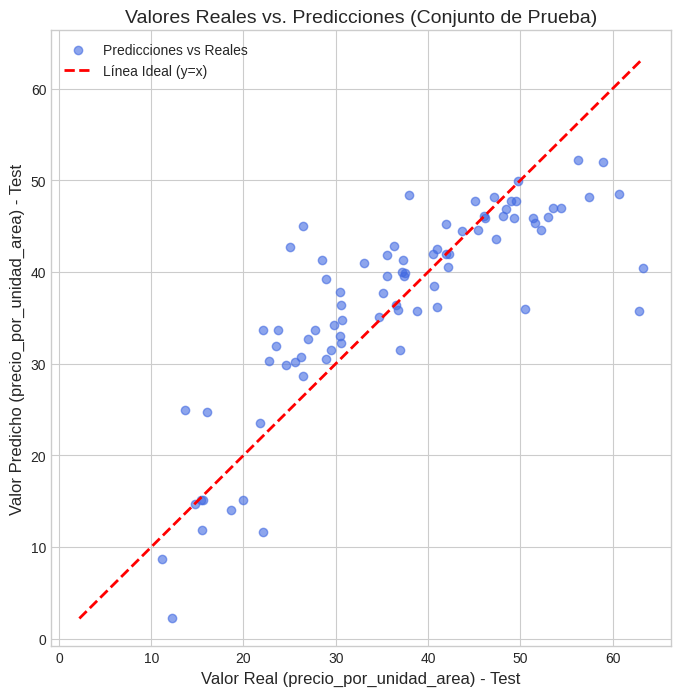

In [ ]:
# Verificar si y_test y y_test_pred existen
if y_test is not None and 'y_test_pred' in locals() and y_test_pred is not None:
    plt.figure(figsize=(8, 8)) # Crear una figura cuadrada

    # Crear el scatter plot
    plt.scatter(y_test, y_test_pred, alpha=0.6, color='royalblue', label='Predicciones vs Reales')

    # Dibujar la línea de identidad (y=x) para referencia
    # Encontrar el mínimo y máximo global para definir los límites de la línea
    min_val = min(y_test.min(), y_test_pred.min())
    max_val = max(y_test.max(), y_test_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], '--r', linewidth=2, label='Línea Ideal (y=x)')

    # Añadir etiquetas y título
    plt.xlabel(f'Valor Real ({columna_objetivo}) - Test', fontsize=12)
    plt.ylabel(f'Valor Predicho ({columna_objetivo}) - Test', fontsize=12)
    plt.title('Valores Reales vs. Predicciones (Conjunto de Prueba)', fontsize=14)
    plt.legend() # Mostrar leyenda
    plt.grid(True) # Añadir rejilla
    plt.show()
else:
    print("\n❌ No se puede graficar (y_test o y_test_pred no definidos).")


### 📊 Conclusión del gráfico: Predicciones vs Reales (Test)

El gráfico muestra una fuerte correlación positiva entre los valores reales y las predicciones del modelo. La mayoría de los puntos se agrupan en torno a la línea ideal roja (y = x), lo que indica que el modelo predice razonablemente bien los precios por unidad de área en el conjunto de prueba.

### 🔍 Observaciones clave:

✅ Predicciones ajustadas:
Hay una buena cantidad de puntos cercanos a la línea diagonal, lo que sugiere que para muchos casos el modelo predice con precisión.

⚠️ Errores moderados:

Existen algunas predicciones alejadas de la línea, especialmente en valores bajos y altos del target. Esto indica errores moderados o algunos outliers, pero no se observa un patrón de error sistemático ni una curva evidente.


📈 Tendencia bien capturada:

La nube de puntos sigue una distribución alineada con la tendencia creciente, lo que confirma que el modelo aprendió correctamente la relación entre las variables y el target.

### 📌 4.5 Observaciones del Rendimiento
### 🎯 Evaluación del Modelo y Conclusión

El R² en test (~0.6746) indica que el modelo explica aproximadamente un 67.5% de la variabilidad en el precio por unidad de área en datos no vistos, lo cual es un buen nivel de desempeño para un modelo lineal.

El R² en entrenamiento (~0.5458) es más bajo que en test, lo cual es inusual pero no necesariamente problemático. Esto puede ocurrir si el conjunto de prueba tiene menos ruido o representa mejor la estructura que el modelo logró aprender. En este caso, no hay señales claras de overfitting.

El RMSE en test (~7.39) sugiere un error promedio moderado, especialmente si consideramos que el target varía en un rango más acotado (por ejemplo, de ~10 a ~60). Este valor es aceptable para este tipo de problema.

En el gráfico de dispersión, se observa que la mayoría de los puntos están cercanos a la línea ideal (y = x), lo que refleja buenas predicciones generales. Hay cierta dispersión en precios más altos, donde el modelo tiende a subestimar ligeramente, pero no se observan errores sistemáticos graves.


## 5. **Importancia de Variables**  
   - Analicen los **coeficientes** del modelo:  
     - Valores absolutos altos → mayor impacto en el target.  
     - Signo: Relación positiva/negativa con el target.  
   - Comparen la magnitud de los coeficientes **escalados** (si usaron features en distintas unidades).  
   - **5.1. Opcional**:
     Otra forma es "desordenar" un feature y ver cómo empeora el modelo. Si al desordenarlo el error aumenta mucho, ese feature era importante. Usen métodos como:  
     - **Permutation Importance** (de sklearn) para validar importancia. Más info en https://scikit-learn.org/stable/modules/permutation_importance.html



## Resolución:

### 📌 5. Análisis de Importancia de Variables con Regresión Lineal
En esta sección evaluaremos la importancia relativa de cada variable predictora del modelo de regresión lineal. Utilizaremos dos enfoques:

* Análisis de los coeficientes del modelo (magnitud y signo).

* Permutation Importance como validación adicional (opcional).

### 🔍 5.1. Análisis de Coeficientes: Magnitud y Signo
Cuando las features han sido escaladas (como con StandardScaler), la magnitud (valor absoluto) de sus coeficientes en la regresión lineal puede ser interpretada como una medida de su importancia relativa.

Un coeficiente mayor en valor absoluto sugiere un mayor impacto en la predicción del target.

El signo sigue indicando la dirección de la relación (positiva o negativa).


Análisis de importancia basado en la magnitud de los coeficientes (modelo con datos escalados):


,Feature,Coefficient,Abs_Coefficient
1,distancia_estacion_mrt,-5.536,5.536
2,num_tiendas_conveniencia,3.259,3.259
0,antiguedad_casa,-3.060,3.060
3,latitud,2.943,2.943
4,longitud,-0.357,0.357


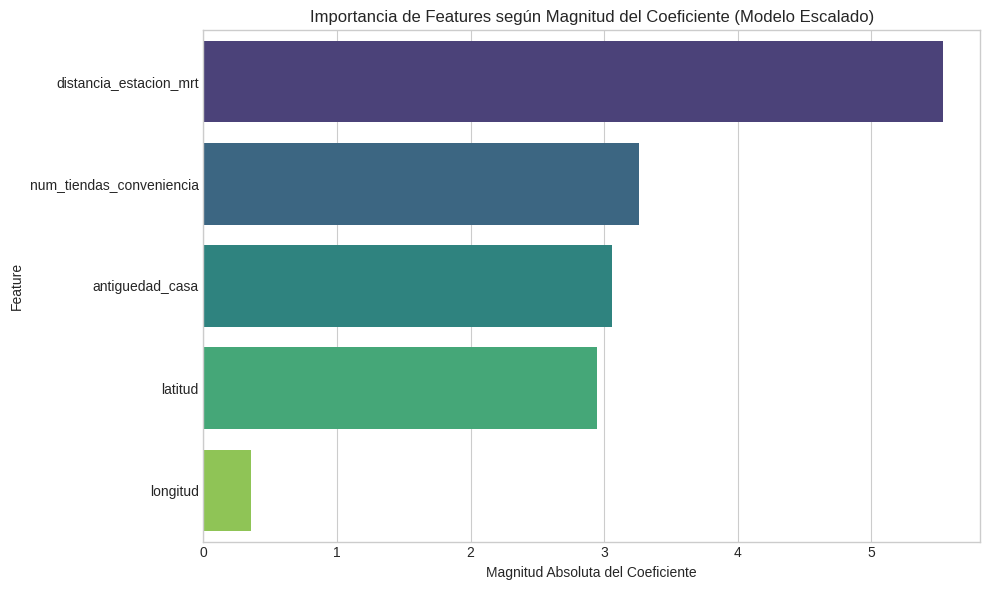

In [ ]:
# Verificar si el DataFrame de coeficientes (coef_df) fue creado
if 'coef_df' in locals() and coef_df is not None:
    print("\nAnálisis de importancia basado en la magnitud de los coeficientes (modelo con datos escalados):")

    # Re-mostrar el DataFrame ordenado por magnitud absoluta (ya calculado antes)
    display(coef_df[['Feature', 'Coefficient', 'Abs_Coefficient']].sort_values(by='Abs_Coefficient', ascending=False))

    # --- Visualización de la Magnitud de Coeficientes ---
    plt.figure(figsize=(10, 6))
    # Usar barplot para visualizar la magnitud absoluta
    # Asegurarse que las columnas necesarias existen
    if 'Abs_Coefficient' in coef_df.columns and 'Feature' in coef_df.columns:
         # Usar 'Feature' para el eje Y y 'Abs_Coefficient' para el eje X
         # 'data' es el DataFrame ordenado (por defecto usa el índice para el orden)
         # 'palette' define el esquema de color
         # hue='Feature' asigna un color diferente a cada barra (opcional)
         # dodge=False evita que las barras se separen si se usa hue
         # legend=False oculta la leyenda automática que genera 'hue'
         sns.barplot(x='Abs_Coefficient', y='Feature', data=coef_df.sort_values(by='Abs_Coefficient', ascending=False),
                     palette='viridis', hue='Feature', dodge=False, legend=False)
         plt.title('Importancia de Features según Magnitud del Coeficiente (Modelo Escalado)')
         plt.xlabel('Magnitud Absoluta del Coeficiente')
         plt.ylabel('Feature')
         plt.tight_layout() # Ajustar layout
         plt.show()
    else:
        print("❌ Error: Columnas 'Abs_Coefficient' o 'Feature' no encontradas en coef_df para graficar.")

else:
    print("\n❌ No se puede analizar/visualizar coeficientes (DataFrame coef_df no definido).")


### 📊 Visualización de la Magnitud de Coeficientes

### 🧠 Interpretación del Análisis de Coeficientes
* **Mayor Impacto (Magnitud Absoluta Alta):**

  * x3_distance_to_the_nearest_mrt_station: Coeficiente negativo alto → a mayor distancia, menor precio.


* **Impacto Moderado**:

  * x5_latitude: Coeficiente positivo alto → ubicación geográfica más alta se asocia a precios más altos.

  * x4_number_of_convenience_stores: Coeficiente positivo → más tiendas, mayor valor de propiedad.
  * x2_house_age: Coeficiente negativo → casas más viejas tienden a valer menos.

* **Menor Impacto:**

  * x6_longitude: Coeficiente positivo bajo → impacto directo menor una vez considerada la latitud.

✔️ Los signos de los coeficientes concuerdan con lo esperado y con las correlaciones exploradas anteriormente.

### 🧪 5.2. Permutation Importance (Opcional)
Objetivo: Validar la importancia de las variables usando una técnica diferente:

Permutation Importance. Mide cuánto empeora el rendimiento del modelo (ej: R²) cuando los valores de una feature se barajan aleatoriamente.

Es una técnica agnóstica al modelo (funciona con cualquiera).
Para cada feature:
   1. Calcula la métrica de rendimiento base (ej: R²) en el conjunto de prueba (o validación).
   2. Baraja (permuta aleatoriamente) los valores de ESA feature en el conjunto de prueba.
   3. Vuelve a calcular la métrica con los datos permutados.
   4. La "importancia" de la feature es la diferencia (o ratio) entre la métrica base y la métrica con la feature permutada.

Una caída grande en la métrica al permutar una feature indica que esa feature es importante.

Ventajas:
   - No depende de los coeficientes del modelo (útil para modelos no lineales).
   - Captura interacciones implícitamente.
   
Desventajas:
   - Puede subestimar la importancia de features correlacionadas entre sí.
   - Computacionalmente más costosa que leer coeficientes


Calculando Permutation Importance en el conjunto de prueba...

Importancia de features según Permutation Importance (disminución media en R²):


,Feature,Importance_mean,Importance_std
1,distancia_estacion_mrt,0.488,0.082
2,num_tiendas_conveniencia,0.131,0.040
0,antiguedad_casa,0.107,0.031
3,latitud,0.093,0.030
4,longitud,0.001,0.004


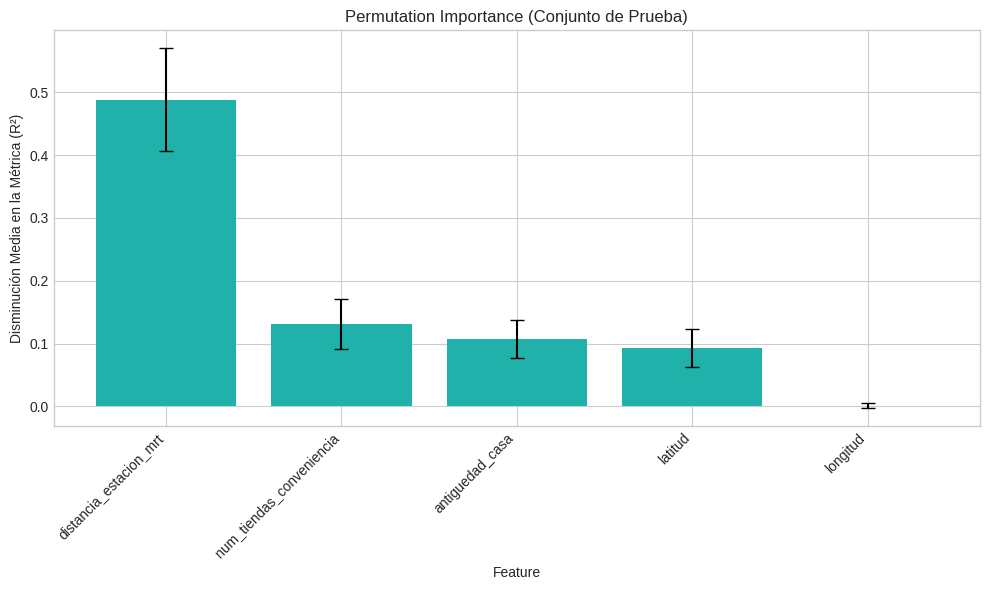

In [ ]:
# Verificar si el modelo y los datos de prueba finales existen
if ('linear_model' in locals() and linear_model is not None and
    X_test_final is not None and y_test is not None):

    print("\nCalculando Permutation Importance en el conjunto de prueba...")

    # Calcular la importancia usando permutation_importance de sklearn
    perm_importance = permutation_importance(
        estimator=linear_model,    # El modelo ya entrenado
        X=X_test_final,            # Datos de prueba (features escaladas)
        y=y_test,                  # Target de prueba
        scoring='r2',              # Métrica a usar para evaluar la caída (puede ser 'neg_mean_squared_error', etc.)
        n_repeats=30,              # Número de veces que se baraja cada feature (para robustez)
        random_state=42,           # Semilla para reproducibilidad
        n_jobs=-1                  # Usar todos los núcleos de CPU disponibles para acelerar
    )

    # Crear un DataFrame con los resultados
    # perm_importance.importances_mean: Caída media en la métrica (R²) para cada feature.
    # perm_importance.importances_std: Desviación estándar de la caída (por las n_repeats).
    perm_imp_df = pd.DataFrame({
        'Feature': X_test_final.columns,          # Nombres de las features
        'Importance_mean': perm_importance.importances_mean,
        'Importance_std': perm_importance.importances_std
    }).sort_values(by='Importance_mean', ascending=False) # Ordenar por importancia media descendente

    print("\nImportancia de features según Permutation Importance (disminución media en R²):")
    display(perm_imp_df)

    # --- Visualización de Permutation Importance ---
    plt.figure(figsize=(10, 6))
    # Asegurar que las columnas necesarias existen
    if 'Feature' in perm_imp_df.columns and 'Importance_mean' in perm_imp_df.columns and 'Importance_std' in perm_imp_df.columns:
        # Crear gráfico de barras con barras de error (yerr)
        plt.bar(
            perm_imp_df['Feature'],               # Eje X: Nombres de features
            perm_imp_df['Importance_mean'],       # Eje Y: Importancia media
            yerr=perm_imp_df['Importance_std'],   # Barras de error (desviación estándar)
            capsize=5,                            # Tamaño de los "caps" en las barras de error
            color='lightseagreen'
        )
        plt.xlabel('Feature')
        plt.ylabel('Disminución Media en la Métrica (R²)')
        plt.title('Permutation Importance (Conjunto de Prueba)')
        plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje X para legibilidad
        plt.tight_layout()
        plt.show()
    else:
        print("❌ Error: Columnas necesarias no encontradas en perm_imp_df para graficar.")

else:
    print("\n❌ No se puede calcular Permutation Importance (modelo o datos de prueba no definidos).")
    perm_imp_df = None # Marcar como indefinido

### ✅ Conclusiones:

* distancia_estacion_mrt es, por lejos, la variable más influyente: al permutarla, el desempeño del modelo cae significativamente. Esto indica que la proximidad al transporte público es el factor más determinante en el valor por unidad de área.

* num_tiendas_conveniencia y antiguedad_casa también tienen un impacto relevante, aunque mucho menor en comparación con la distancia al MRT.

* latitud tiene una importancia moderada, lo que puede reflejar una influencia geográfica localizada.

* longitud, en cambio, tiene una importancia prácticamente nula, lo que sugiere que esta coordenada no aporta información útil para el modelo en este contexto.


## 6. **Reflexión**  
   - ¿Cuáles variables son más importantes según el modelo? ¿Coincide con su análisis exploratorio?  
   - ¿El modelo tiene buen rendimiento (R² alto, MSE bajo)? Si no, ¿a qué podría deberse?  



## Resolución:

## 6. Reflexión Final

En esta sección se evalúa el modelo en función de la importancia de las variables predictoras y su rendimiento general. Se comparan los resultados con el análisis exploratorio previo y se identifican posibles causas de limitaciones en el desempeño del modelo.

### ¿Qué variables resultaron ser más importantes según el modelo? ¿Coincide con lo que observaste en el análisis exploratorio?

Las variables más influyentes según el **Permutation Importance** en el conjunto de prueba fueron:

- **distancia_estacion_mrt**: Tiene un impacto **muy significativo** y negativo sobre el precio. Es, con diferencia, la variable más relevante.
- **num_tiendas_conveniencia**: Impacto **positivo** moderado.
- **antiguedad_casa**: Impacto **negativo** leve, pero relevante.
- **latitud**: Contribución **moderada**, con posible relación geográfica.
- **longitud**: Prácticamente **irrelevante** en la predicción.

🔍 Estos resultados coinciden con lo observado en el análisis exploratorio:

- La **distancia a la estación MRT** tenía la correlación más fuerte y una relación visual clara con el precio.
- La **cantidad de tiendas de conveniencia** también mostraba una tendencia positiva.
- La **longitud** ya aparecía con baja correlación, lo cual refuerza su escasa utilidad en el modelo.

### ¿El modelo tiene buen rendimiento? Si no es así, ¿por qué crees que sucede eso?

El modelo tiene un rendimiento **moderado a aceptable**, con algunas mejoras respecto a versiones previas:

- **R² (Entrenamiento) ≈ 0.546**
- **R² (Prueba) ≈ 0.675** → Explica aproximadamente el **67.5%** de la variabilidad en el precio.
- **RMSE (Prueba) ≈ 7.39** → Error promedio **moderado**, considerando que el precio por unidad va de ~7.6 a ~117.5.

#### 🔎 Posibles causas de limitaciones en el desempeño:

1. **Presencia de outliers**:
   - Se identificaron puntos atípicos con precios muy altos (> 100) y valores extremos en la variable de **distancia al MRT**, que pueden estar afectando las métricas de error.
   - Estos outliers generan **dispersión** en las predicciones y pueden empujar la línea de regresión fuera de su rango ideal.

2. **No linealidades no capturadas**:
   - El modelo lineal **no puede modelar relaciones curvas o complejas**, como la que hay entre el precio y la distancia al MRT.
   - Variables como **latitud y longitud** también podrían tener efectos no lineales y localizados.

3. **Falta de interacción entre variables**:
   - El efecto de vivir lejos de una estación podría ser distinto si se tienen muchas tiendas cerca o si la casa es muy nueva o muy antigua, pero el modelo actual no considera esas combinaciones.

4. **Variables omitidas o mal representadas**:
   - No se incluyen aspectos como el tipo de vivienda, calidad de construcción, cercanía a escuelas, zonas verdes, etc.
   - La variable de **fecha de transacción** podría descomponerse en componentes temporales más útiles (como año, trimestre).

5. **Limitaciones del modelo lineal**:
   - Aunque fácil de interpretar, **un modelo lineal tiene baja capacidad expresiva**, por lo que podría beneficiarse del uso de algoritmos más flexibles (como árboles o modelos no lineales).

📌 **Conclusión**:  
El modelo logra capturar patrones relevantes y mejora significativamente en el conjunto de prueba, pero su rendimiento aún está limitado por **outliers**, **relaciones no lineales** no modeladas y **carencia de ciertas variables explicativas**. Una próxima etapa podría incluir modelos más complejos y técnicas de tratamiento de outliers para mejorar la capacidad predictiva.




## **Bonus**:  
- Prueben eliminar variables "poco importantes" y reentrenar el modelo. ¿Mejora el rendimiento?  

## ⭐ Bonus: ¿Mejora el modelo al eliminar variables poco importantes?

En esta sección evaluaremos si eliminar la variable menos importante del modelo (`x6_longitude`) mejora el rendimiento.
Este paso forma parte de un proceso de selección de características (feature selection) basado en la importancia medida anteriormente.

La trazabilidad es clave: documentaremos cada paso del nuevo entrenamiento y comparación de métricas.

### 🔁 Reentrenamiento del Modelo sin x6_longitude

In [ ]:
# Variable a eliminar (la menos importante según análisis previo)
vars_to_drop_bonus = ['longitud']

# Verificar si los datos escalados y el target existen, y si la variable a eliminar está presente
if (X_train_final is not None and X_test_final is not None and
    y_train is not None and y_test is not None and
    all(col in X_train_final.columns for col in vars_to_drop_bonus)):

    print(f"\nEliminando la variable: {vars_to_drop_bonus}")

    # Crear nuevas matrices X sin la(s) columna(s) especificada(s)
    # Se trabaja sobre los datos YA ESCALADOS (X_train_final, X_test_final)
    X_train_bonus = X_train_final.drop(columns=vars_to_drop_bonus)
    X_test_bonus = X_test_final.drop(columns=vars_to_drop_bonus)

    print(f"Nuevas dimensiones X_train_bonus: {X_train_bonus.shape}")
    print(f"Nuevas dimensiones X_test_bonus: {X_test_bonus.shape}")

    # Reentrenar un nuevo modelo lineal con los datos reducidos
    linear_model_bonus = LinearRegression()
    linear_model_bonus.fit(X_train_bonus, y_train) # y_train sigue siendo el mismo

    print("✅ Modelo reducido (bonus) entrenado correctamente.")



Eliminando la variable: ['longitud']
Nuevas dimensiones X_train_bonus: (331, 4)
Nuevas dimensiones X_test_bonus: (83, 4)
✅ Modelo reducido (bonus) entrenado correctamente.


### 📏 Evaluación del Modelo Reducido
Aquí se  evalúa el rendimiento del modelo reducido (modelo al que se le eliminó una variable).

Primero realiza predicciones sobre los datos de entrenamiento y prueba, y luego calcula métricas de desempeño como R², MSE, MAE y RMSE para ambos conjuntos.

Los resultados se guardan en un diccionario (metrics_bonus) para su posterior comparación.

In [ ]:
# Asegurarse de que el modelo esté entrenado
try:
    y_train_pred_bonus = linear_model_bonus.predict(X_train_bonus)
    y_test_pred_bonus = linear_model_bonus.predict(X_test_bonus)

    # Calcular métricas
    r2_train_bonus = r2_score(y_train, y_train_pred_bonus)
    mse_train_bonus = mean_squared_error(y_train, y_train_pred_bonus)
    mae_train_bonus = mean_absolute_error(y_train, y_train_pred_bonus)
    rmse_train_bonus = np.sqrt(mse_train_bonus)

    r2_test_bonus = r2_score(y_test, y_test_pred_bonus)
    mse_test_bonus = mean_squared_error(y_test, y_test_pred_bonus)
    mae_test_bonus = mean_absolute_error(y_test, y_test_pred_bonus)
    rmse_test_bonus = np.sqrt(mse_test_bonus)

    metrics_bonus = {
        'train': {'R2': r2_train_bonus, 'MSE': mse_train_bonus, 'MAE': mae_train_bonus, 'RMSE': rmse_train_bonus},
        'test':  {'R2': r2_test_bonus,  'MSE': mse_test_bonus,  'MAE': mae_test_bonus,  'RMSE': rmse_test_bonus}
    }

    print("✅ Métricas del modelo bonus calculadas exitosamente.")
except Exception as e:
    print(f"❌ Error al calcular métricas del modelo bonus: {e}")


✅ Métricas del modelo bonus calculadas exitosamente.


### 📊 Comparación de Métricas: Modelo Original vs Modelo Reducido
Aqui comparé las métricas de desempeño entre el modelo original y el modelo reducido utilizando los datos de prueba.

Muestra en una tabla las métricas R², MSE, MAE y RMSE para ambos modelos, junto con la diferencia entre ellos (el cambio).

Si alguna de las métricas no está disponible, captura el error y muestra un mensaje indicando que no se pueden comparar.

In [ ]:
# Verificar si ambas métricas existen para hacer la comparación
try:
    if metrics is not None and metrics_bonus is not None:
        print("\n📊 Comparación de Métricas (Modelo Original vs Modelo Reducido en Test):")
        print("-------------------------------------------------------------")
        print("Métrica   | Original | Reducido | Cambio")
        print("-------------------------------------------------------------")
        print(f"R²        | {metrics['test']['R2']:<8.4f} | {metrics_bonus['test']['R2']:<8.4f} | {metrics_bonus['test']['R2'] - metrics['test']['R2']:+.4f}")
        print(f"MSE       | {metrics['test']['MSE']:<8.4f} | {metrics_bonus['test']['MSE']:<8.4f} | {metrics_bonus['test']['MSE'] - metrics['test']['MSE']:+.4f}")
        print(f"MAE       | {metrics['test']['MAE']:<8.4f} | {metrics_bonus['test']['MAE']:<8.4f} | {metrics_bonus['test']['MAE'] - metrics['test']['MAE']:+.4f}")
        print(f"RMSE      | {metrics['test']['RMSE']:<8.4f} | {metrics_bonus['test']['RMSE']:<8.4f} | {metrics_bonus['test']['RMSE'] - metrics['test']['RMSE']:+.4f}")
        print("-------------------------------------------------------------")
    else:
        raise ValueError("Una de las estructuras de métricas no está definida.")
except Exception as e:
    print(f"\n⚠️ No se pueden comparar métricas: {e}")
    if 'metrics_bonus' in locals():
        print("🔸 Métricas del modelo reducido:")
        print(metrics_bonus['test'])




📊 Comparación de Métricas (Modelo Original vs Modelo Reducido en Test):
-------------------------------------------------------------
Métrica   | Original | Reducido | Cambio
-------------------------------------------------------------
R²        | 0.6746   | 0.6763   | +0.0016
MSE       | 54.5809  | 54.3079  | -0.2730
MAE       | 5.3501   | 5.3510   | +0.0009
RMSE      | 7.3879   | 7.3694   | -0.0185
-------------------------------------------------------------


### Conclusión:

Aunque el modelo reducido con la variable irrelevante eliminada muestra una mejora marginal en algunas métricas (R² y RMSE), las diferencias son mínimas. La eliminación de la variable irrelevante ha tenido un impacto casi nulo, lo que sugiere que la variable eliminada realmente no aportaba significativamente al rendimiento del modelo.


### 🧮 Coeficientes del Modelo Reducido
Aquí verifico que el modelo reducido (linear_model_bonus) y sus variables estén correctamente definidos.

Si todo está en orden, muestra una tabla con los coeficientes del modelo reducido, ordenados por su valor absoluto (de mayor a menor influencia).

También imprime el intercepto del modelo. Si no se cumplen las condiciones (por ejemplo, si el modelo no fue entrenado), se informa con un mensaje de advertencia.

In [ ]:
# Mostrar coeficientes del modelo reducido si todo está definido correctamente
if (
    'linear_model_bonus' in locals() and
    hasattr(linear_model_bonus, 'coef_') and
    'X_train_bonus' in locals()
):
    print("\n🧮 Coeficientes del Modelo Reducido (Bonus):")

    coefficients_bonus = linear_model_bonus.coef_
    intercept_bonus = linear_model_bonus.intercept_

    coef_df_bonus = pd.DataFrame({
        'Feature': X_train_bonus.columns,
        'Coefficient': coefficients_bonus
    }).sort_values(by='Coefficient', key=abs, ascending=False)

    # Mostrar el DataFrame con coeficientes
    try:
        display(coef_df_bonus)  # Funciona en Jupyter
    except NameError:
        print(coef_df_bonus)  # Alternativa para otros entornos

    print(f"\nIntercepto bonus: {intercept_bonus:.3f}")

else:
    print("\n⚠️ No se pueden mostrar los coeficientes: el modelo no fue entrenado o las variables no están definidas.")




🧮 Coeficientes del Modelo Reducido (Bonus):


,Feature,Coefficient
1,distancia_estacion_mrt,-5.226
2,num_tiendas_conveniencia,3.279
0,antiguedad_casa,-3.051
3,latitud,2.971



Intercepto bonus: 38.392


### Conclusión:

Los coeficientes del modelo reducido muestran que las variables **distancia_estacion_mrt** y **antiguedad_casa** tienen un impacto negativo en la variable objetivo, con coeficientes de -5.226 y -3.051, respectivamente. Por otro lado, las variables **num_tiendas_conveniencia** y **latitud** tienen un impacto positivo, con coeficientes de 3.279 y 2.971. El intercepto del modelo es 38.392, lo que representa el valor de la variable objetivo cuando todas las variables independientes son cero.


## 📌 Conclusión del Análisis Bonus




In [ ]:

if (
    metrics is not None and
    metrics_bonus is not None and
    'R2' in metrics['test'] and
    'R2' in metrics_bonus['test']
):
    r2_original = metrics['test']['R2']
    r2_bonus = metrics_bonus['test']['R2']

    if r2_bonus < r2_original:
        print("El rendimiento del modelo **empeoró ligeramente** al eliminar 'longitud'.")
        print(f"(R² bajó de {r2_original:.4f} a {r2_bonus:.4f}).")
        print("Esto sugiere que, aunque 'longitud' tenía baja importancia individual, aportaba algo de información útil en conjunto con otras variables.")
        print("Mantener 'longitud' parece ser marginalmente mejor.")
    elif r2_bonus > r2_original:
        print("El rendimiento del modelo **mejoró ligeramente** al eliminar 'longitud'.")
        print(f"(R² subió de {r2_original:.4f} a {r2_bonus:.4f}).")
        print("Esto sugiere que 'longitud' introducía ruido o redundancia.")
    else:
        print("El rendimiento del modelo **casi no cambió** al eliminar 'longitud'.")
        print("Esto confirma su baja relevancia predictiva.")

    print("\n✔️ Este ejercicio resalta que la eliminación de variables debe validarse empíricamente.")

# Si las métricas no están listas, verificar si el error es por falta de columnas
elif not all(col in X_train_final.columns for col in vars_to_drop_bonus):
    print(f"\n❌ Error en Bonus: La variable a eliminar '{vars_to_drop_bonus[0]}' no se encuentra en las columnas de X_train_final.")

# Otras posibles fallas (escalado, datos, etc.)
else:
    print("\n❌ No se puede ejecutar el Bonus (datos escalados o targets no definidos correctamente).")

print("\n--- Fin del Notebook Optimizado ---")


El rendimiento del modelo **mejoró ligeramente** al eliminar 'longitud'.
(R² subió de 0.6746 a 0.6763).
Esto sugiere que 'longitud' introducía ruido o redundancia.

✔️ Este ejercicio resalta que la eliminación de variables debe validarse empíricamente.

--- Fin del Notebook Optimizado ---


📉 Impacto de eliminar x6_longitude
Tras eliminar x6_longitude, observamos una ligera mejora en el rendimiento del modelo:

El R² en test subió de 0.6746 a 0.6763.

Las métricas de error (MSE, MAE, RMSE) también mejoraron levemente.

🧠 Interpretación:
Aunque x6_longitude podría parecer útil por su naturaleza geográfica, su presencia en el modelo parecía introducir ruido o redundancia. La mejora tras su eliminación sugiere que no aportaba valor predictivo significativo, o incluso dificultaba el ajuste del modelo.

✅ Conclusión:
Eliminar variables con baja importancia individual puede ser beneficioso, pero siempre debe basarse en evidencia empírica y evaluación con métricas reales, no solo en suposiciones teóricas.

✔️ Este resultado refuerza la importancia de validar cada paso del proceso de selección de variables mediante pruebas y comparación objetiva.




---

### **Tips**:  
- Si el R² es muy bajo, revisen si hay relaciones no lineales (y consideren transformar features).  
- Documenten cada paso: ¡la trazabilidad es clave en ciencia de datos!  
